In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
data = data.rename(columns={"emotion":"label","pixels":"image"})

In [4]:
data['emotion'] = data['label'].apply(lambda x: emotions[int(x)])
data

,label,image,Usage,emotion
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,Happy


In [5]:
data.drop(columns=['Usage'],inplace=True)

In [6]:
data

,label,image,emotion
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Neutral
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,Happy


<Axes: xlabel='emotion', ylabel='count'>

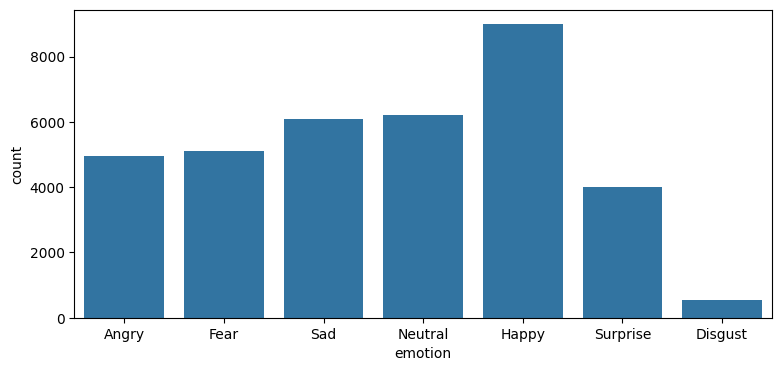

In [7]:
import seaborn as sns
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

In [10]:
m = data.groupby('label').count().mean().values[0]
oversampled = pd.DataFrame()

for emotion in emotions:
    print('\n' + emotion)
    l = len(data[data.emotion == emotion])
    print('Before sampling: ' + str(l))

    if l >= m:
        df = data[data.emotion == emotion].sample(int(m))
        oversampled = pd.concat([oversampled, df], ignore_index=True)
        print('After sampling: ' + str(len(df)))
    else:
        frac = int(m / l)
        df_list = [data[data.emotion == emotion]] * (frac + 1)
        df = pd.concat(df_list, ignore_index=True)
        df = df.sample(int(m))
        oversampled = pd.concat([oversampled, df], ignore_index=True)
        print('After sampling: ' + str(len(df)))

oversampled = oversampled.sample(frac=1).reset_index(drop=True)



Angry
Before sampling: 4953
After sampling: 5126

Disgust
Before sampling: 547
After sampling: 5126

Fear
Before sampling: 5121
After sampling: 5126

Happy
Before sampling: 8989
After sampling: 5126

Sad
Before sampling: 6077
After sampling: 5126

Surprise
Before sampling: 4002
After sampling: 5126

Neutral
Before sampling: 6198
After sampling: 5126


In [11]:
#save the oversampled dataset
oversampled.to_csv('metadata_processed.csv', index=False)

In [12]:
data = pd.read_csv("metadata_processed.csv")

<Axes: xlabel='emotion', ylabel='count'>

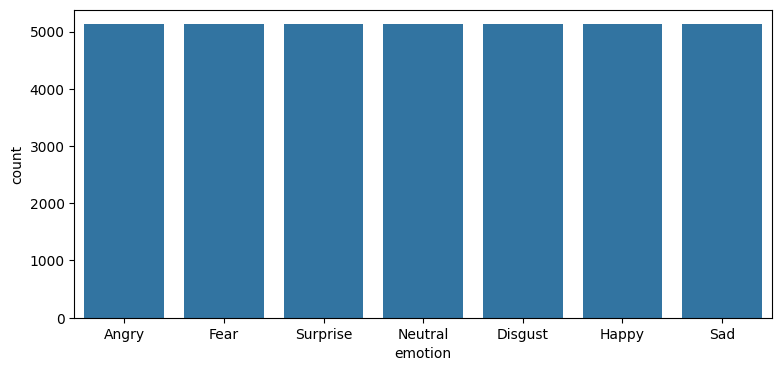

In [13]:
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

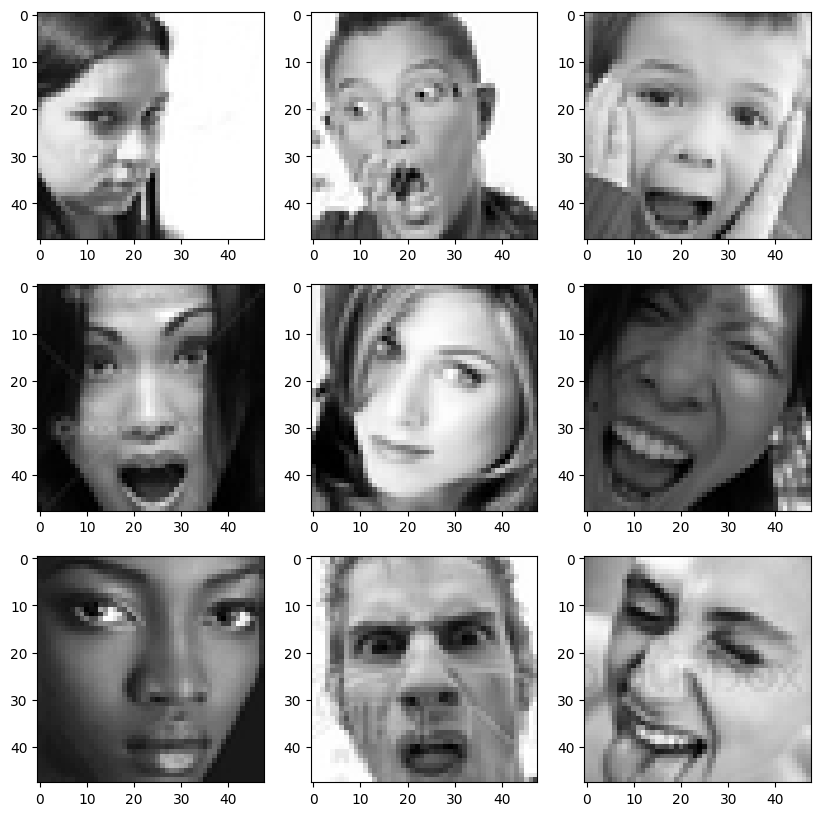

In [14]:
labels = data.iloc[:, 0]
pixels = data.iloc[:, 1]
images = np.zeros((pixels.shape[0], 48*48))
for ix in range(images.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(images.shape[1]):
        images[ix, iy] = int(p[iy])
plt.figure(figsize = (10,10))
for index,image in enumerate(images[:9]):
    plt.subplot(3,3,index+1)
    plt.imshow(image.reshape((48,48)), cmap = 'gray')
plt.show()
train_or_test = data.iloc[:, 2].values

In [15]:
data['emotion'].unique()

array(['Angry', 'Fear', 'Surprise', 'Neutral', 'Disgust', 'Happy', 'Sad'],
      dtype=object)

In [16]:
reshaped_images = np.zeros((images.shape[0], 48, 48,1))
i = 0
for image in images:
  reshaped_images[i] = image.reshape((48,48,1))
  i+=1
reshaped_images.shape

(35882, 48, 48, 1)

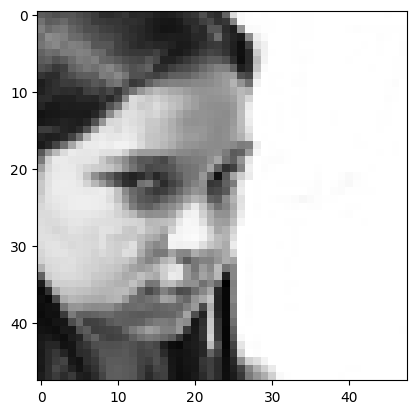

In [17]:
norm_images = reshaped_images / 255.0
plt.imshow(norm_images[0].reshape((48,48)), cmap="gray")
plt.show()

In [18]:
from tensorflow.keras.utils import to_categorical
new_labels = to_categorical(labels, num_classes=7)
new_labels.shape

(35882, 7)

In [19]:
reshaped_images.shape

(35882, 48, 48, 1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_images, new_labels, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28705, 48, 48, 1), (7177, 48, 48, 1), (28705, 7), (7177, 7))

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [22]:
#Building up Model Architecture
model = Sequential()
model.add(Conv2D(64, (3,3), padding = "same", input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation = "softmax"))

opt = Adam(lr = 0.0005)

model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [23]:
epochs = 30

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

checkpoint = ModelCheckpoint("fer_model.h5", monitor='val_loss', 
                             mode='max', verbose=1)

callbacks = [checkpoint, reduce_lr]

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks, epochs = epochs)

Epoch 1/30
898/898 [==============================] - ETA: 0s - loss: 1.7727 - accuracy: 0.3310
Epoch 1: saving model to fer_model.h5


c:\Users\LAPSHOP\keras_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


898/898 [==============================] - 1283s 1s/step - loss: 1.7727 - accuracy: 0.3310 - val_loss: 1.4692 - val_accuracy: 0.4360 - lr: 0.0010
Epoch 2/30
898/898 [==============================] - ETA: 0s - loss: 1.3424 - accuracy: 0.4911
Epoch 2: saving model to fer_model.h5
898/898 [==============================] - 1294s 1s/step - loss: 1.3424 - accuracy: 0.4911 - val_loss: 1.3929 - val_accuracy: 0.4487 - lr: 0.0010
Epoch 3/30
898/898 [==============================] - ETA: 0s - loss: 1.1716 - accuracy: 0.5574
Epoch 3: saving model to fer_model.h5
898/898 [==============================] - 1117s 1s/step - loss: 1.1716 - accuracy: 0.5574 - val_loss: 1.1405 - val_accuracy: 0.5603 - lr: 0.0010
Epoch 4/30
898/898 [==============================] - ETA: 0s - loss: 1.0692 - accuracy: 0.5939
Epoch 4: saving model to fer_model.h5
898/898 [==============================] - 1449s 2s/step - loss: 1.0692 - accuracy: 0.5939 - val_loss: 1.0717 - val_accuracy: 0.5824 - lr: 0.0010
Epoch 5/30
898

In [24]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}

  #emojis unicodes #
emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f610" }
print(emojis.values(),sep=" ")

dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '😐'])


In [25]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt 
def _predict(path):
  facecasc = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
  imagePath = path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  
                                             
    plt.imshow(image)
    plt.show()

No of faces :  6
1/1 [==============================] - 1s 979ms/step
person  1  :  Fearful --> 😨


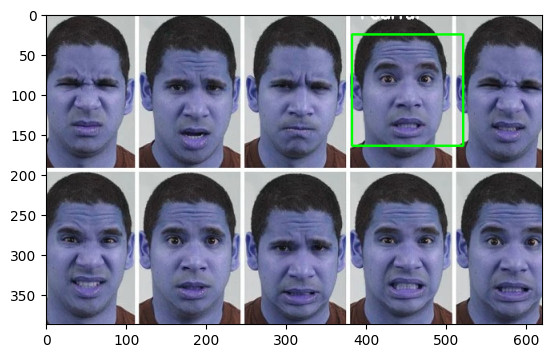

1/1 [==============================] - 0s 70ms/step
person  1  :  Surprised --> 😲


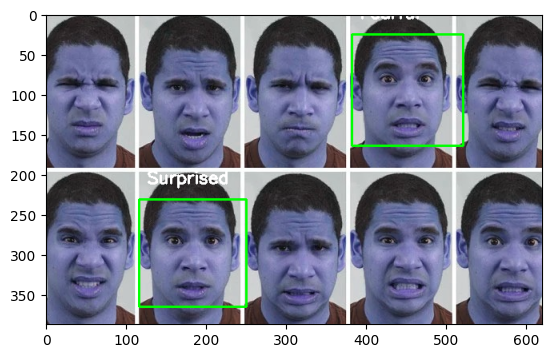

1/1 [==============================] - 0s 47ms/step
person  1  :  Fearful --> 😨


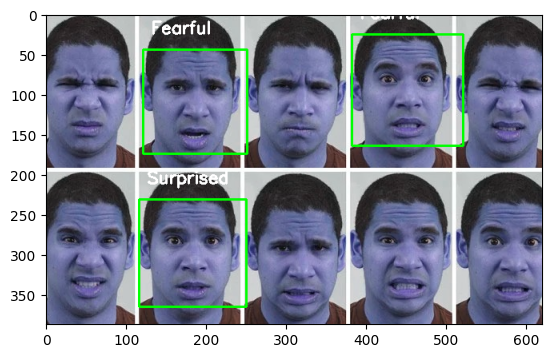

1/1 [==============================] - 0s 47ms/step
person  1  :  Sad --> 😥


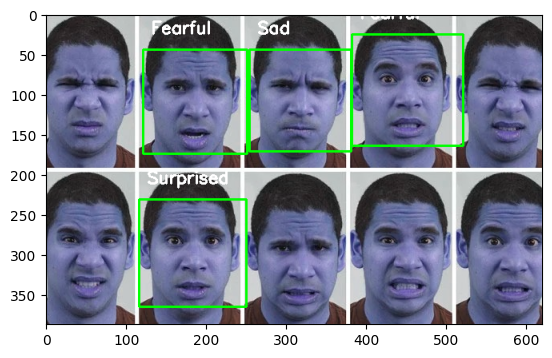

1/1 [==============================] - 0s 51ms/step
person  1  :  Angry --> 😠


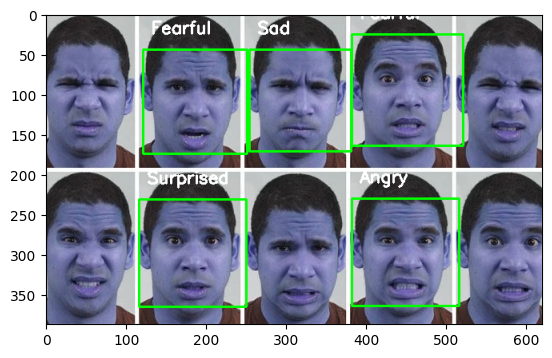

1/1 [==============================] - 0s 53ms/step
person  1  :  Sad --> 😥


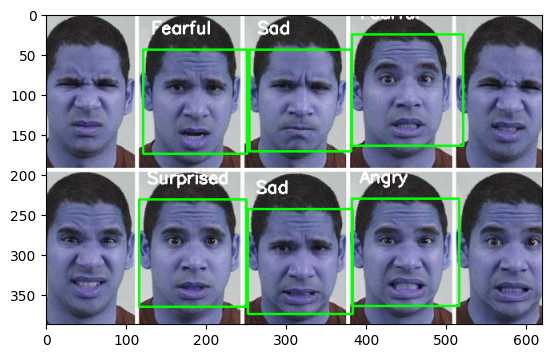

In [34]:
_predict("tenface.JPG")

No of faces :  6
1/1 [==============================] - 0s 40ms/step
person  1  :  Fearful --> 😨


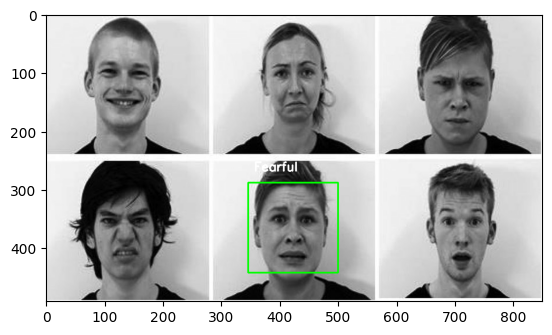

1/1 [==============================] - 0s 33ms/step
person  1  :  Happy --> 😊


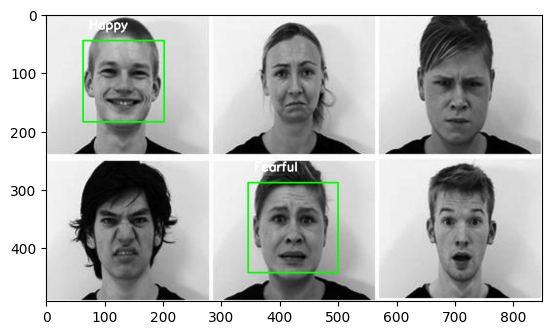

1/1 [==============================] - 0s 39ms/step
person  1  :  Sad --> 😥


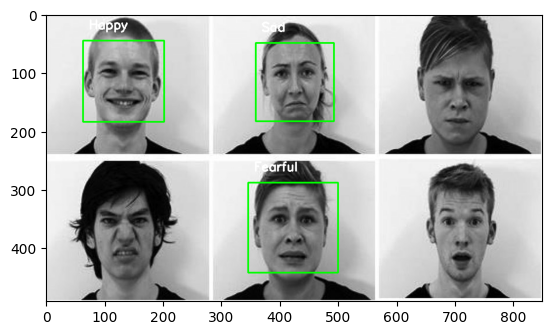

1/1 [==============================] - 0s 39ms/step
person  1  :  Angry --> 😠


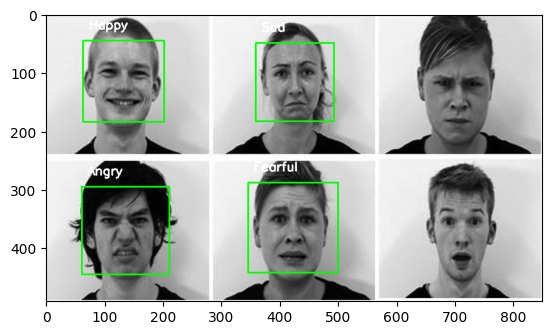

1/1 [==============================] - 0s 34ms/step
person  1  :  Surprised --> 😲


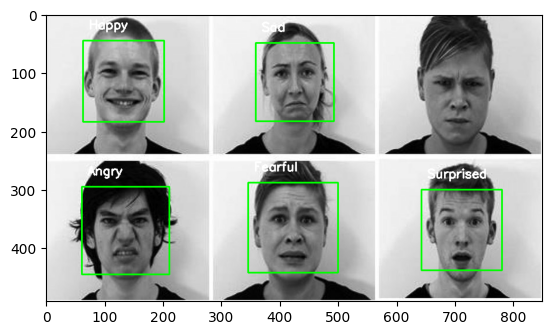

1/1 [==============================] - 0s 40ms/step
person  1  :  Angry --> 😠


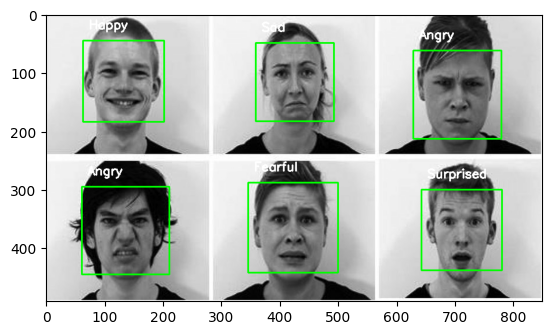

In [35]:
_predict("sixface.JPG")


No of faces :  1
1/1 [==============================] - 0s 42ms/step
person  1  :  Neutral --> 😐


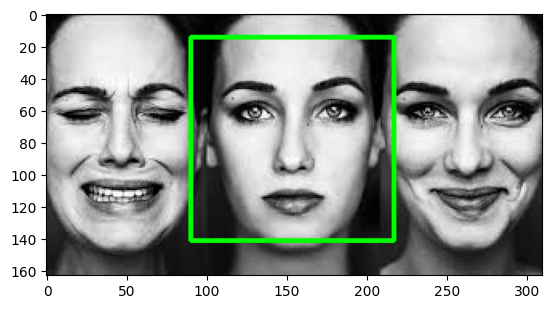

In [37]:
_predict("threeface.JPG")


No of faces :  1
1/1 [==============================] - 0s 77ms/step
person  1  :  Neutral --> 😐


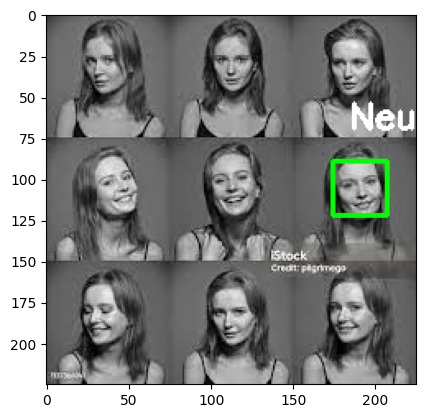

In [41]:
_predict("nineface.JPG")


In [42]:
#_predict("IMG_2893.JPG")


In [43]:
#_predict("IMG_3419.JPG")


In [44]:
#_predict("PXL_20221112_055431313.MP.jpg")


In [45]:
#_predict("PXL_20221112_055620945.MP.jpg")


In [46]:
from sklearn.metrics import accuracy_score
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model.predict(X_test), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

225/225 [==============================] - 69s 305ms/step
CNN Model Accuracy on test set: 0.7280


In [47]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

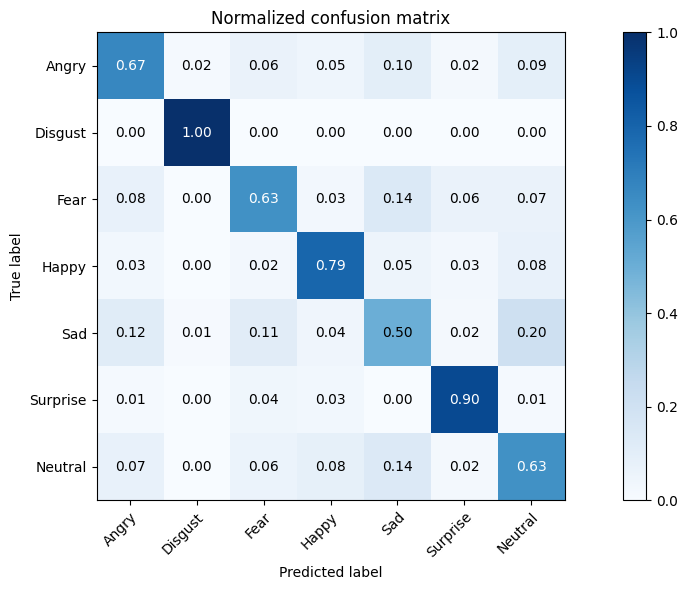

In [48]:

from sklearn.metrics import classification_report, confusion_matrix
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.show()

In [50]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred))

225/225 [==============================] - 61s 271ms/step
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1062
           1       0.97      1.00      0.98      1001
           2       0.68      0.63      0.65      1029
           3       0.77      0.79      0.78      1008
           4       0.54      0.50      0.52      1035
           5       0.86      0.90      0.88      1002
           6       0.58      0.63      0.60      1040

    accuracy                           0.73      7177
   macro avg       0.73      0.73      0.73      7177
weighted avg       0.72      0.73      0.73      7177

